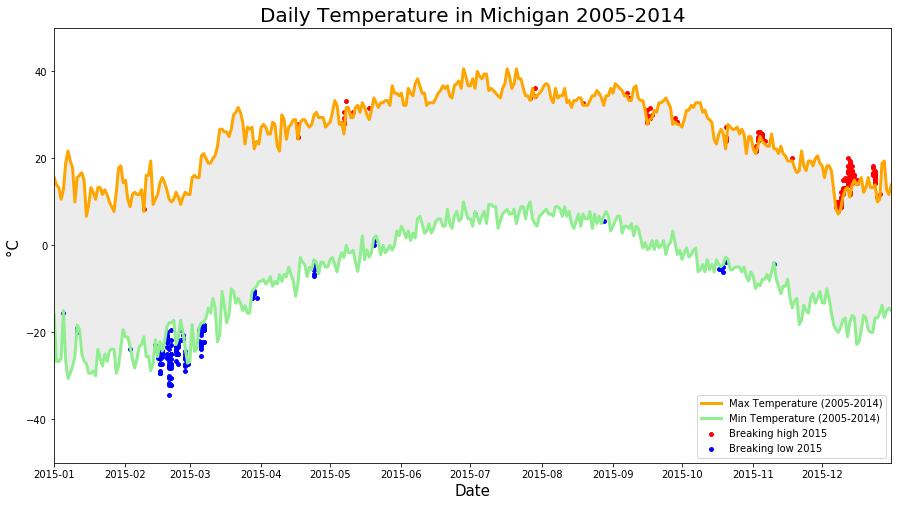

In [4]:
%matplotlib notebook
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as ticker

import pandas as pd
import numpy as np

df = pd.read_csv('fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

# Convert all data to degrees Celsius:
df['Data_Value'] = df['Data_Value']*0.1

df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year

df['Month_day'] = df['Date'].dt.strftime('%m-%d')

df[df['Year'] == 2015]

df = df[df['Month_day']!='02-29']

df_max = df[(df['Element'] == 'TMAX')&(df['Year']<2015) & (df['Year']>=2005)].groupby('Month_day')['Data_Value'].max()
df_min = df[(df['Element'] == 'TMIN')&(df['Year']<2015) & (df['Year']>=2005)].groupby('Month_day')['Data_Value'].min()

df_max = df_max.reset_index(drop=False).rename(columns={'Data_Value':'Max_temp'})
df_min = df_min.reset_index(drop=False).rename(columns={'Data_Value':'Min_temp'})

df = df.merge(df_max, on = 'Month_day', how = 'left')
df = df.merge(df_min, on = 'Month_day', how = 'left')

record_low = df[(df.Year==2015) & (df.Data_Value < df.Min_temp)]
record_high = df[(df.Year==2015) & (df.Data_Value > df.Max_temp)]

time_range = np.arange('2015-01-01', '2016-01-01', dtype='datetime64[D]')

plt.figure(figsize=(15,8))

plt.plot(time_range, df_max['Max_temp'], color = 'orange', linewidth = 3)
plt.plot(time_range, df_min['Min_temp'], color = 'lightgreen', linewidth = 3)

plt.scatter(record_high.Date.values, record_high.Data_Value.values, color='red', s=15)
plt.scatter(record_low.Date.values, record_low.Data_Value.values, color='Blue', s=15)

ax = plt.gca()
ax.axis(['2015/01/01','2015/12/31',-50,50])

plt.xlabel("Date", fontsize = 15, color = "Black")
plt.ylabel("°C ", fontsize = 15, color = "Black")

plt.legend(['Max Temperature (2005-2014)','Min Temperature (2005-2014)','Breaking high 2015','Breaking low 2015'],loc=4,frameon=True)

ax.fill_between(time_range, df_max['Max_temp'], df_min['Min_temp'], facecolor='grey', alpha=0.15)
plt.title("Daily Temperature in Michigan 2005-2014", fontsize = 20)
plt.savefig('foo.png')




In [30]:
plt.savefig('foo.png')


<Figure size 432x288 with 0 Axes>